In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import style
style.use("fivethirtyeight")
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
pima=pd.read_csv("diabetes.csv")
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
pima.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [5]:
pima.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


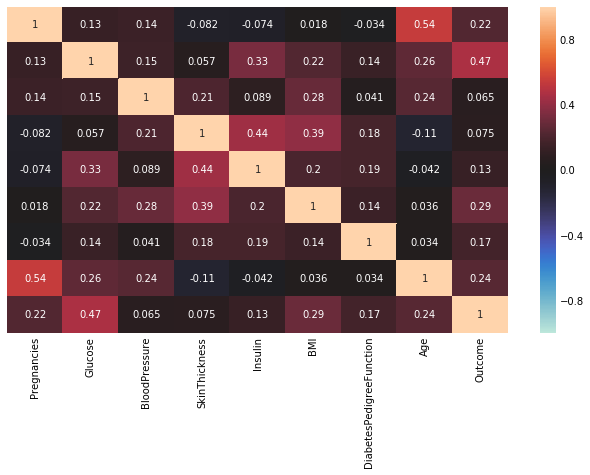

In [6]:
plt.figure(figsize=(10,6))
sns.heatmap(pima.corr(),yticklabels=False,vmin=-1,vmax=1,center=0,annot=True)

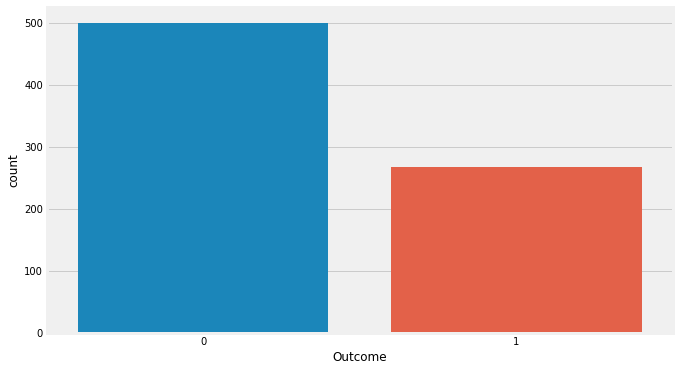

In [7]:
plt.figure(figsize=(10,6))
sns.countplot(x="Outcome",data=pima)

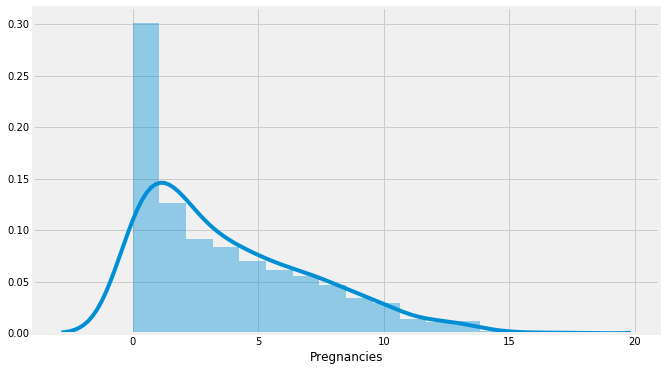

In [8]:
plt.figure(figsize=(10,6))
sns.distplot(pima["Pregnancies"])

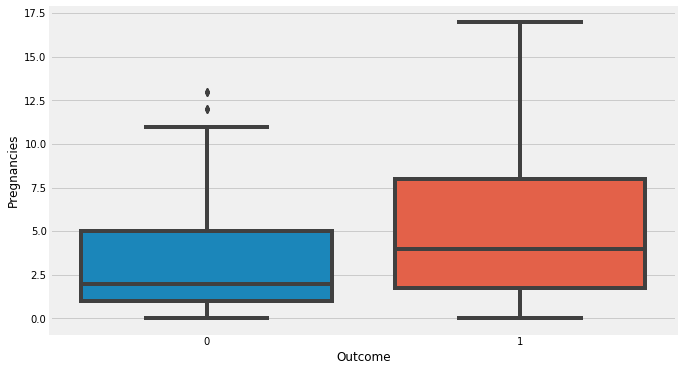

In [9]:
plt.figure(figsize=(10,6))
sns.boxplot(x="Outcome",y="Pregnancies",data=pima)

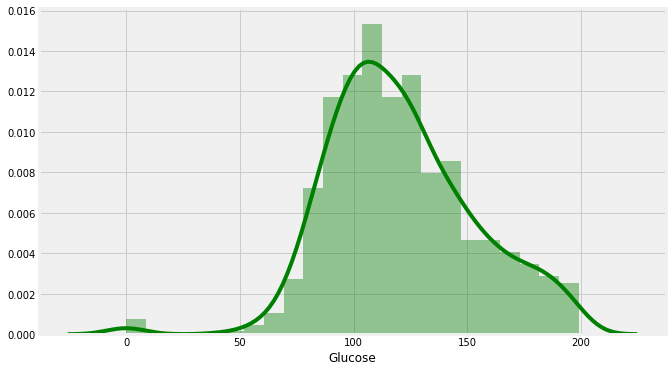

In [10]:
plt.figure(figsize=(10,6))
sns.distplot(pima["Glucose"],color="g")

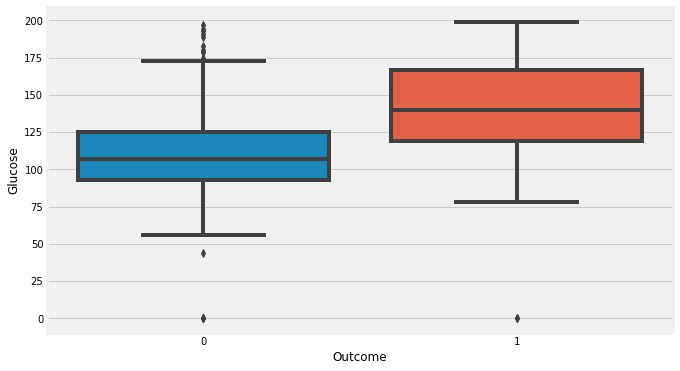

In [11]:
plt.figure(figsize=(10,6))
sns.boxplot(x="Outcome",y="Glucose",data=pima)

[Text(0.5, 0, '\nGlucose'),
 Text(0.5, 0, '\nOutcome'),
 Text(0.5, 0, '\nPregnancies')]

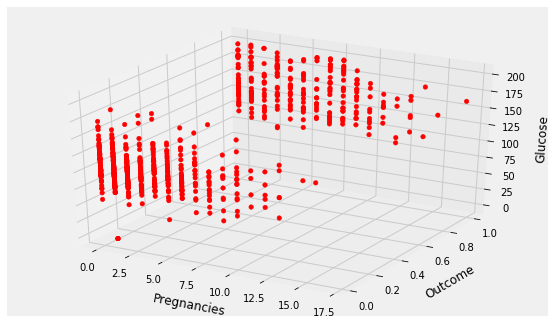

In [12]:
fig=plt.figure(figsize=(19,12.5))
ax=fig.add_subplot(2,2,1,projection='3d')
ax.scatter(pima["Pregnancies"],pima["Outcome"],pima["Glucose"],c="red",alpha=1,edgecolors=None)
ax.set(xlabel='\nPregnancies',ylabel='\nOutcome',zlabel='\nGlucose')

In [13]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout

In [14]:
x=pima.drop("Outcome",axis=1).values
y=pima["Outcome"].values

In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=23)

In [16]:
scalar=StandardScaler()
x_train=scalar.fit_transform(x_train)
x_test=scalar.transform(x_test)

In [17]:
def creating_model(optimizer="Rmsprop",loss="binary_crossentropy"):
    model=Sequential()
    model.add(Dense(30,input_dim=8,activation="relu"))
    model.add(Dropout(0.5))
    model.add(Dense(15,activation="relu"))
    model.add(Dropout(0.5))
    model.add(Dense(12,activation="relu"))
    model.add(Dropout(0.5))
    model.add(Dense(8,activation="relu"))
    model.add(Dense(1,activation="sigmoid"))
    model.compile(loss=loss,optimizer=optimizer,metrics=["accuracy"])
    return model
model=creating_model()

In [18]:
early_stopping=EarlyStopping(monitor="val_loss",mode="min",patience=25,verbose=1)

In [19]:
model.fit(x=x_train,y=y_train,
          validation_data=(x_test,y_test),
          batch_size=30,epochs=550,verbose=1,
          callbacks=[early_stopping])

Train on 576 samples, validate on 192 samples
Epoch 1/550
576/576 [==============================] - 1s 2ms/sample - loss: 0.7105 - accuracy: 0.5104 - val_loss: 0.6811 - val_accuracy: 0.6510
Epoch 2/550
576/576 [==============================] - 0s 106us/sample - loss: 0.6986 - accuracy: 0.5625 - val_loss: 0.6736 - val_accuracy: 0.6562
Epoch 3/550
576/576 [==============================] - 0s 84us/sample - loss: 0.7006 - accuracy: 0.5729 - val_loss: 0.6668 - val_accuracy: 0.6562
Epoch 4/550
576/576 [==============================] - 0s 125us/sample - loss: 0.6709 - accuracy: 0.6076 - val_loss: 0.6589 - val_accuracy: 0.6562
Epoch 5/550
576/576 [==============================] - 0s 141us/sample - loss: 0.6752 - accuracy: 0.6233 - val_loss: 0.6519 - val_accuracy: 0.6562
Epoch 6/550
576/576 [==============================] - 0s 147us/sample - loss: 0.6624 - accuracy: 0.6372 - val_loss: 0.6427 - val_accuracy: 0.6562
Epoch 7/550
576/576 [==============================] - 0s 150us/sample - lo

576/576 [==============================] - 0s 152us/sample - loss: 0.5461 - accuracy: 0.7135 - val_loss: 0.4659 - val_accuracy: 0.7917
Epoch 57/550
576/576 [==============================] - 0s 156us/sample - loss: 0.5457 - accuracy: 0.7153 - val_loss: 0.4666 - val_accuracy: 0.7917
Epoch 58/550
576/576 [==============================] - 0s 151us/sample - loss: 0.5310 - accuracy: 0.7431 - val_loss: 0.4646 - val_accuracy: 0.7917
Epoch 59/550
576/576 [==============================] - 0s 149us/sample - loss: 0.5256 - accuracy: 0.7205 - val_loss: 0.4637 - val_accuracy: 0.7917
Epoch 60/550
576/576 [==============================] - 0s 92us/sample - loss: 0.5364 - accuracy: 0.7344 - val_loss: 0.4642 - val_accuracy: 0.7969
Epoch 61/550
576/576 [==============================] - 0s 104us/sample - loss: 0.5084 - accuracy: 0.7587 - val_loss: 0.4622 - val_accuracy: 0.7969
Epoch 62/550
576/576 [==============================] - 0s 145us/sample - loss: 0.5291 - accuracy: 0.7378 - val_loss: 0.4609 -

In [20]:
loss=pd.DataFrame(model.history.history)
loss.head()

,loss,accuracy,val_loss,val_accuracy
0,0.710481,0.510417,0.681121,0.651042
1,0.698575,0.562500,0.673572,0.656250
2,0.700591,0.572917,0.666842,0.656250
3,0.670852,0.607639,0.658860,0.656250
4,0.675156,0.623264,0.651903,0.656250


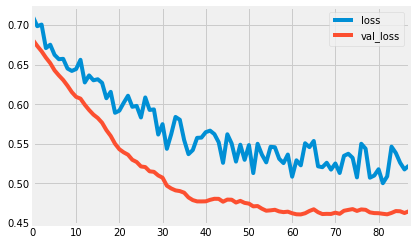

In [21]:
loss[["loss","val_loss"]].plot()

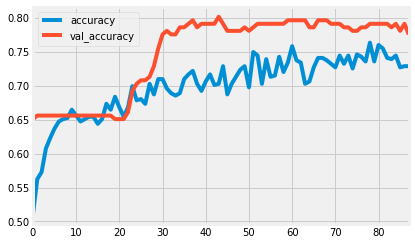

In [22]:
loss[["accuracy","val_accuracy"]].plot()

In [23]:
y_pred=model.predict_classes(x_test)

In [24]:
# analysing the results
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[112  14]
 [ 29  37]]
              precision    recall  f1-score   support

           0       0.79      0.89      0.84       126
           1       0.73      0.56      0.63        66

    accuracy                           0.78       192
   macro avg       0.76      0.72      0.74       192
weighted avg       0.77      0.78      0.77       192



In [25]:
scores=model.evaluate(x_test,y_test)
print(model.metrics_names[1],scores[1]*100)

192/192 [==============================] - 0s 88us/sample - loss: 0.4647 - accuracy: 0.7760
accuracy 77.60416865348816
